In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')


In [4]:
!pip install seaborn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
conn=sqlite3.connect('inventory.db')
df=pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actualprice,Volume,Totalpurchasequan,Totalpurchasedoll,totalsalequantity,totalsalesdoll,totalsaleprice,totalsaleexcise,freightcost,Grossprofit,Profitmargin,Stockturnover,Saletopurchaseratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
Actualprice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
Totalpurchasequan,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
Totalpurchasedoll,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
totalsalequantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
totalsalesdoll,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
totalsaleprice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


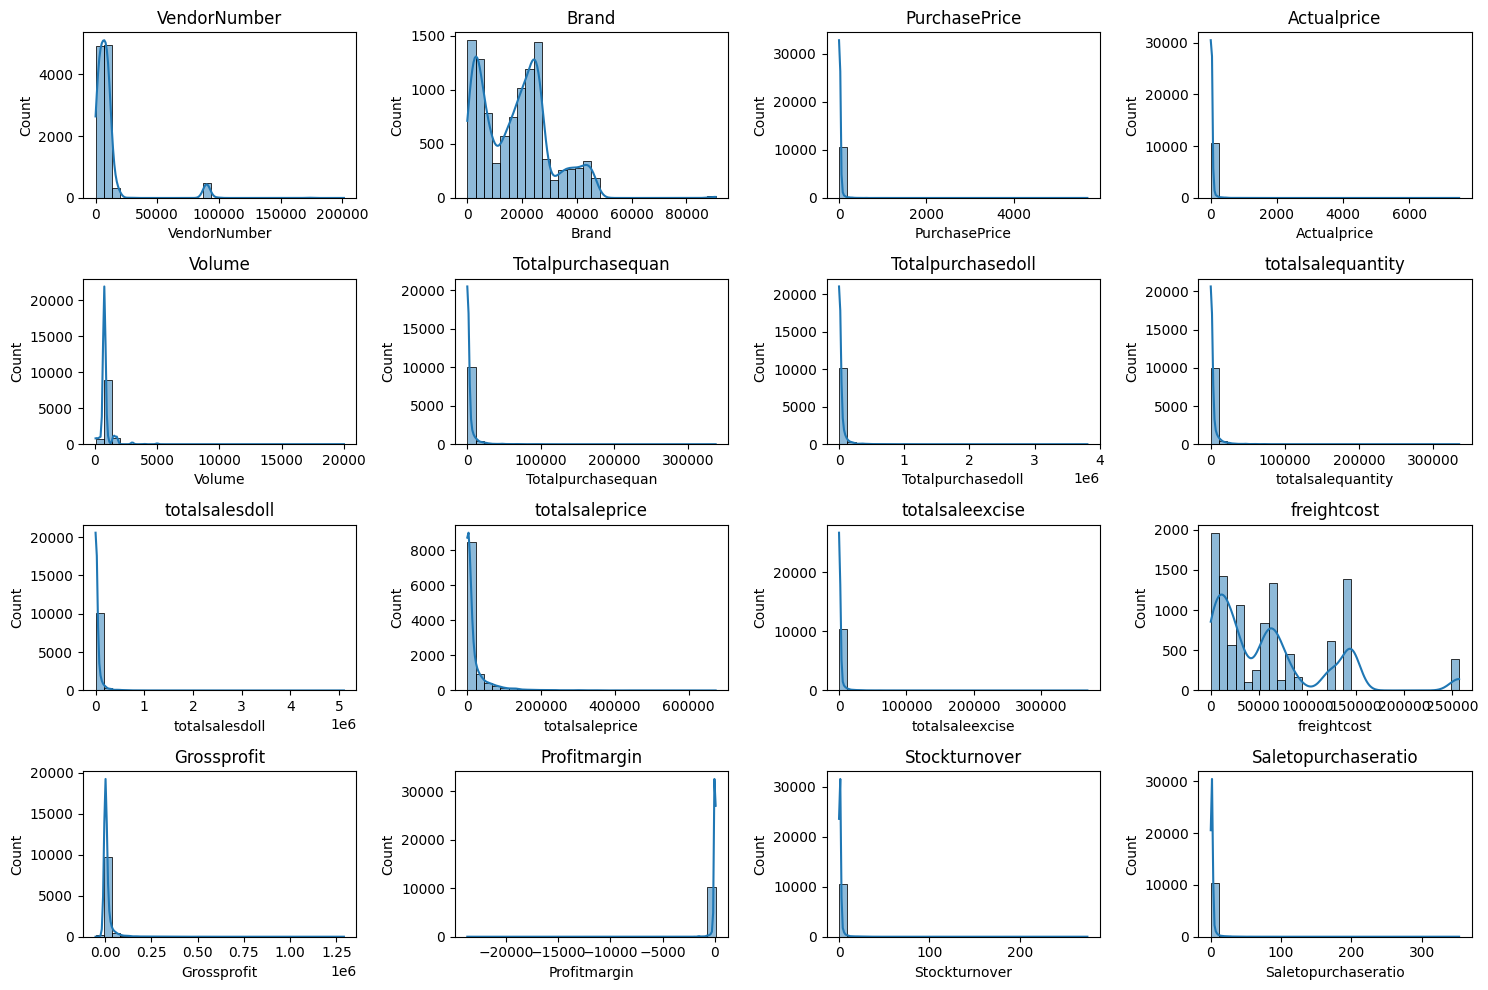

In [7]:
numerical_cols=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

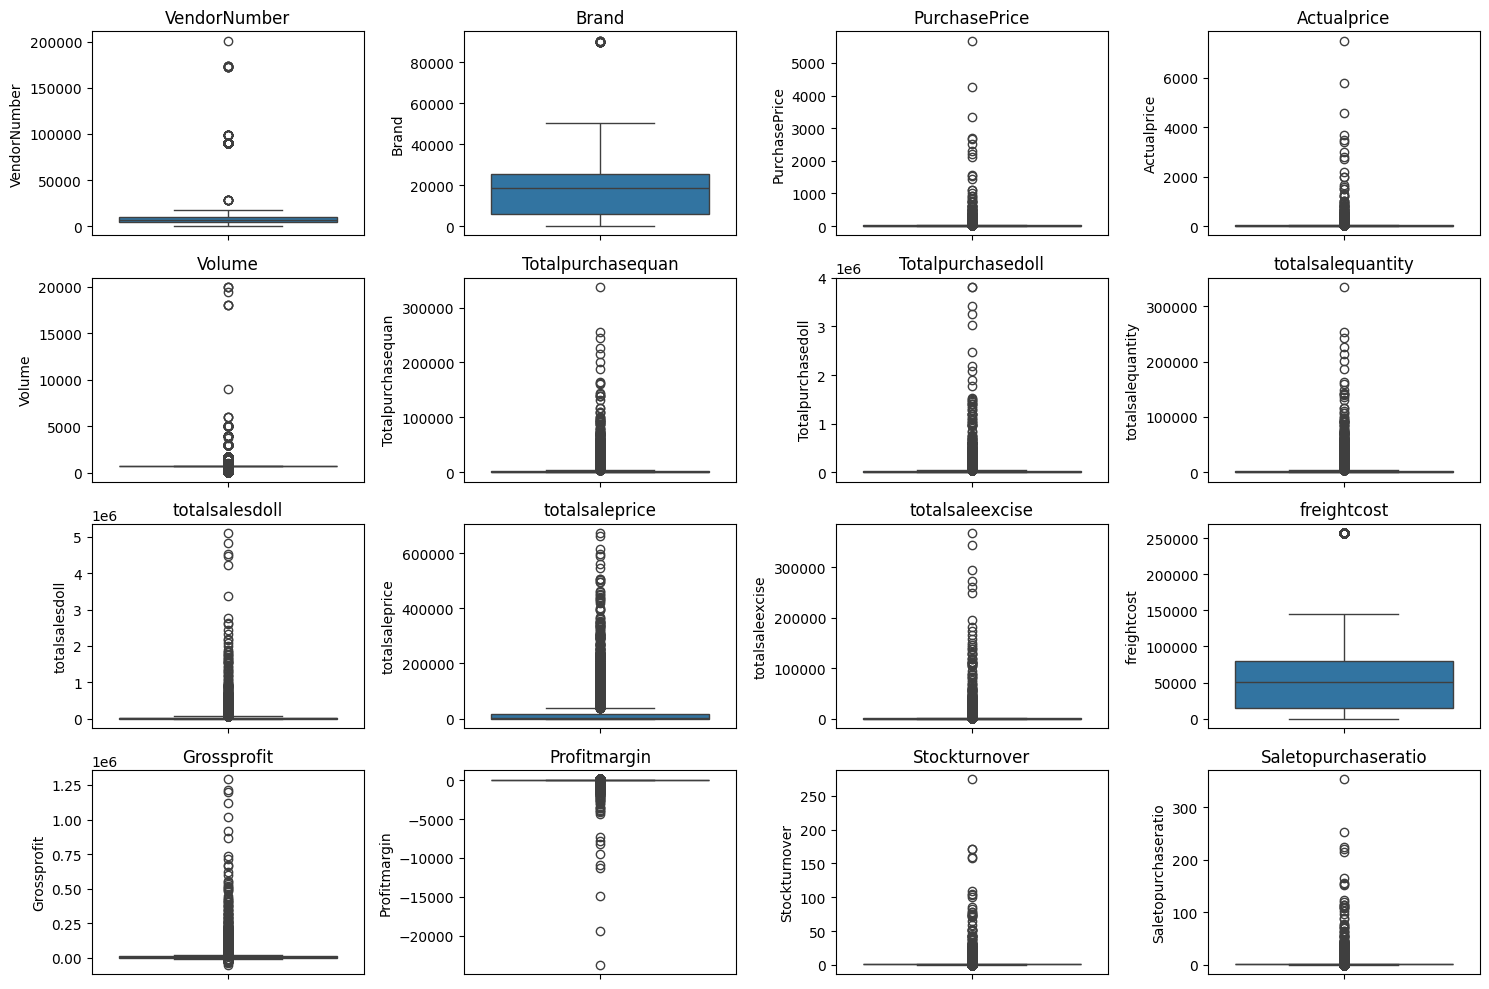

In [8]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [9]:
df=pd.read_sql_query("select * from vendor_sales_summary where Grossprofit>0 and Profitmargin>0 and totalsalequantity>0",conn)

In [10]:
pd.read_sql_query("SELECT COUNT(*) FROM vendor_sales_summary", conn)


,COUNT(*)
0,10692


In [11]:
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary WHERE Grossprofit > 0 AND Profitmargin > 0 AND totalsalequantity > 0", conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actualprice,Volume,Totalpurchasequan,Totalpurchasedoll,totalsalequantity,totalsalesdoll,totalsaleprice,totalsaleexcise,freightcost,Grossprofit,Profitmargin,Stockturnover,Saletopurchaseratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


In [13]:
df.to_csv("vendor_sales_summary.csv", index=False)


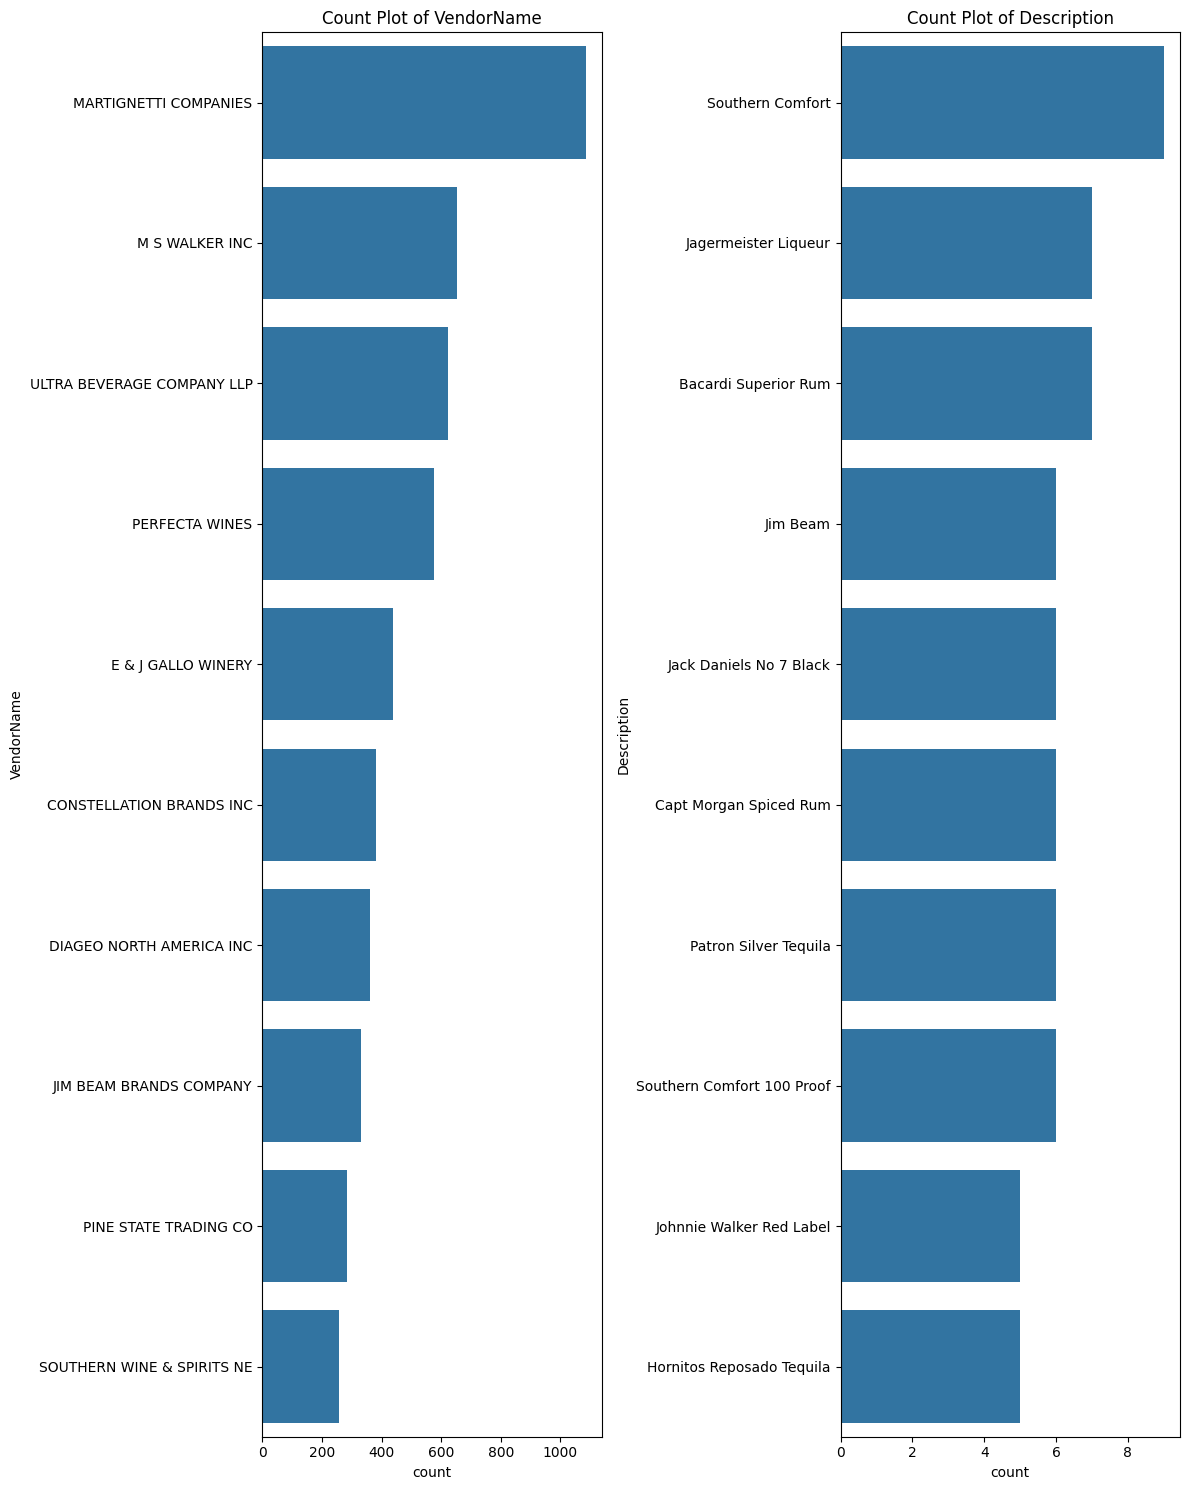

In [10]:
categorical_cols=["VendorName","Description"]
plt.figure(figsize=(12,15))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

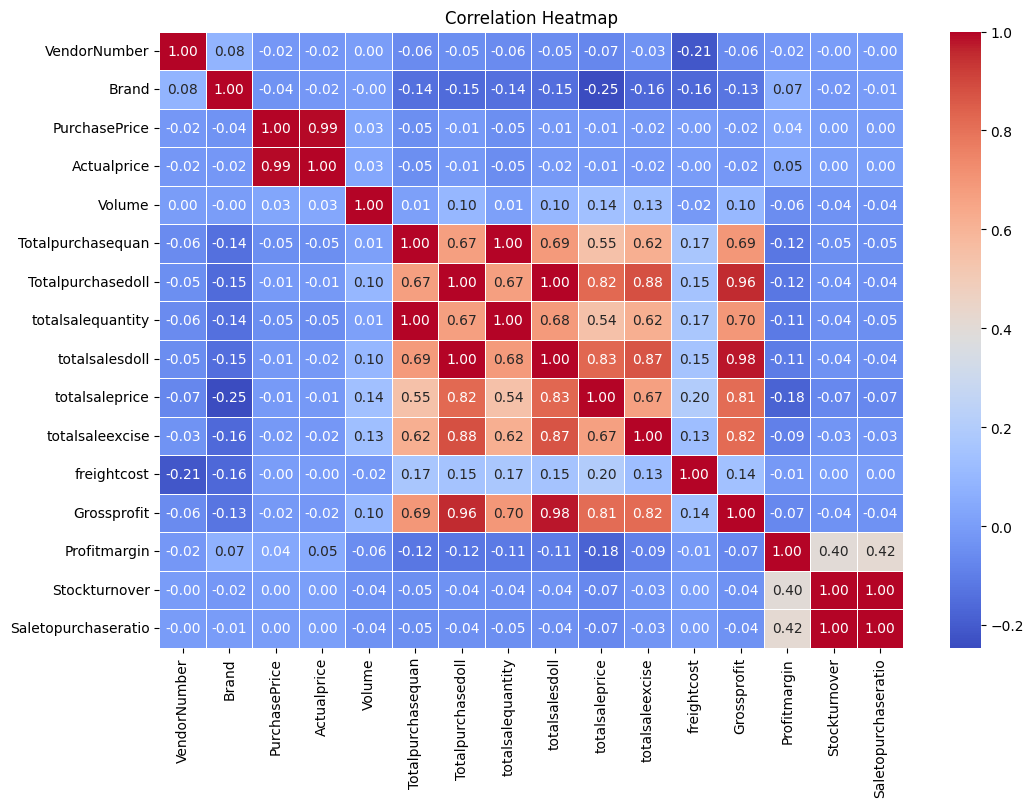

In [11]:
plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


1.Identify brands that need promotional or pricing adjustment which exhibit lower sales performance but higher profit margins.

In [12]:
brands_performance=df.groupby('Description').agg({
'totalsalesdoll':'sum',
'Profitmargin':'mean'}).reset_index()
brands_performance
                             

,Description,totalsalesdoll,Profitmargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [13]:
low_sales_threshold=brands_performance['totalsalesdoll'].quantile(0.15)
high_margin_threshold=brands_performance['Profitmargin'].quantile(0.85)

In [14]:
low_sales_threshold

np.float64(560.299)

In [15]:
high_margin_threshold

np.float64(64.97017552750113)

In [16]:
target_brands=brands_performance[
(brands_performance['totalsalesdoll']<=low_sales_threshold)&(brands_performance['Profitmargin']>=high_margin_threshold)
]
print("Brands with low sales but high profit margin:")
display(target_brands.sort_values('totalsalesdoll'))

Brands with low sales but high profit margin:


,Description,totalsalesdoll,Profitmargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


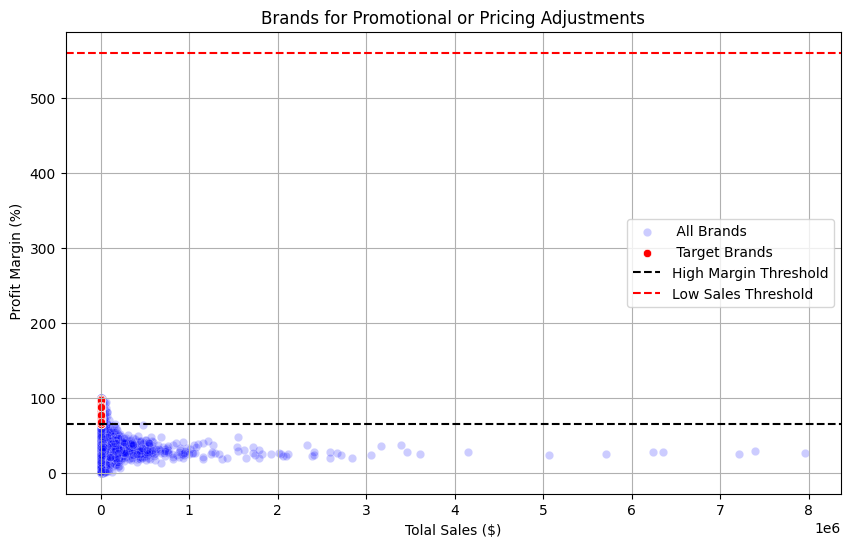

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brands_performance,x='totalsalesdoll' ,y='Profitmargin',color="blue",label=" All Brands",alpha=0.2)
sns.scatterplot(data=target_brands,x='totalsalesdoll' ,y='Profitmargin',color="red",label=" Target Brands")

plt.axhline(high_margin_threshold,linestyle='--',color="black",label="High Margin Threshold")
plt.axhline(low_sales_threshold,linestyle='--',color="red",label="Low Sales Threshold")

plt.xlabel("Tolal Sales ($)")
plt.ylabel(" Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
brands_performance=brands_performance[brands_performance['totalsalesdoll']<10000]

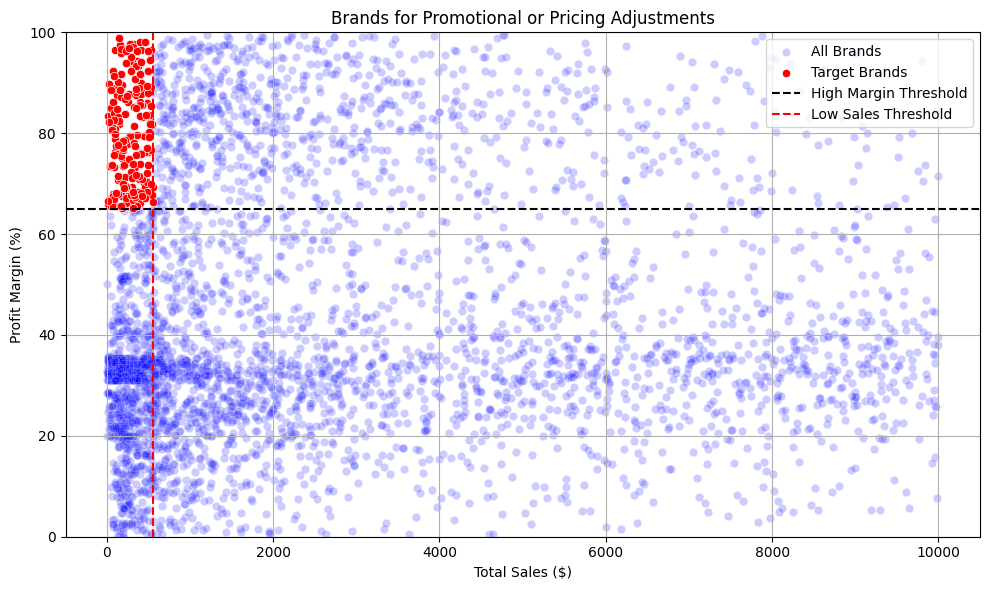

In [19]:
plt.figure(figsize=(10, 6))

# All brands (faded blue)
sns.scatterplot(
    data=brands_performance,
    x='totalsalesdoll',
    y='Profitmargin',
    color="blue",
    label="All Brands",
    alpha=0.2
)

# Target brands (red)
sns.scatterplot(
    data=target_brands,
    x='totalsalesdoll',
    y='Profitmargin',
    color="red",
    label="Target Brands"
)

# Threshold lines
plt.axhline(high_margin_threshold, linestyle='--', color="black", label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color="red", label="Low Sales Threshold")  # corrected to axvline for sales

# Labels and formatting
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.ylim(0, 100)  # Set y-axis limit
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2.which vendors and brands demonstrate the highest sales performance

In [20]:
def format_dollar(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value>=1_000:
        return f"{value/1_000:.2f}k"
    else:
        return str(value)


In [21]:
top_vendors=df.groupby("VendorName")["totalsalesdoll"].sum().nlargest(10)
top_brands=df.groupby("Description")["totalsalesdoll"].sum().nlargest(10)

In [22]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: totalsalesdoll, dtype: float64

In [23]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: totalsalesdoll, dtype: float64

In [24]:
top_brands.apply(lambda x:format_dollar(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: totalsalesdoll, dtype: object

In [25]:
top_vendors.apply(lambda x:format_dollar(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: totalsalesdoll, dtype: object

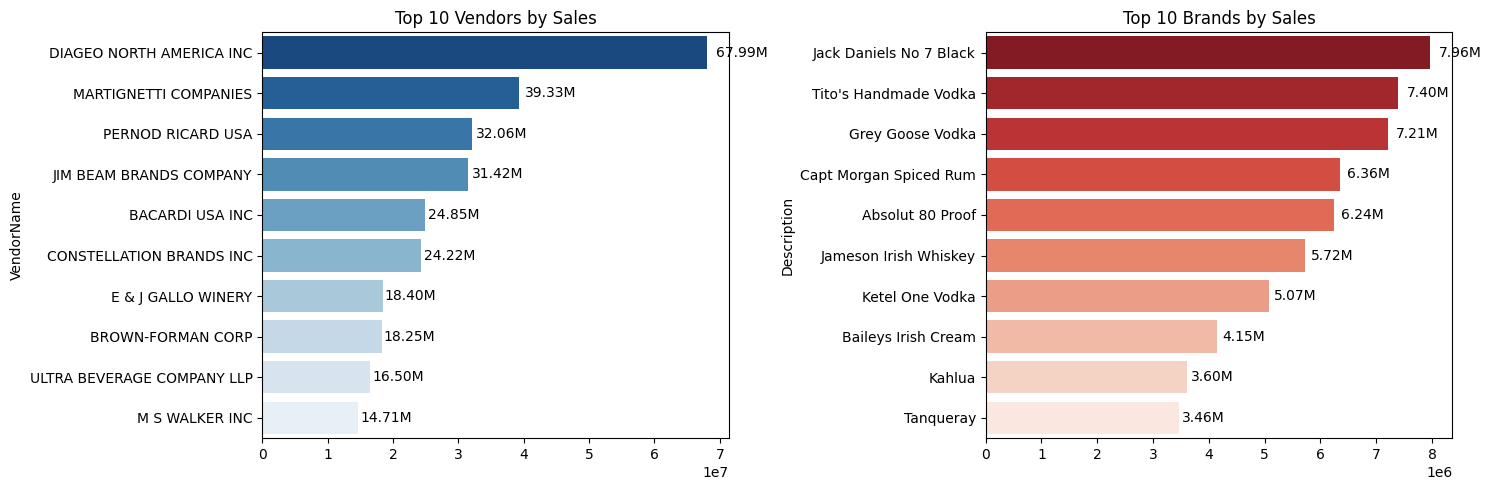

In [28]:





plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")
for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollar(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")
for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollar(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


3.which vendor contribute the most to total purchase dollars?


In [29]:
vendor_performance=df.groupby('VendorName').agg({
    'Totalpurchasedoll':'sum',
    'Grossprofit':'sum',
    'totalsalesdoll':'sum',
}).reset_index()

In [30]:
vendor_performance['purchasecontribution%']=vendor_performance['Totalpurchasedoll']/vendor_performance['Totalpurchasedoll'].sum()*100

In [31]:
vendor_performance=round(vendor_performance.sort_values('purchasecontribution%',ascending=False),2)


In [32]:
top_vendors=vendor_performance.head(10)
top_vendors['totalsalesdoll']=top_vendors['totalsalesdoll'].apply(format_dollar)
top_vendors['Totalpurchasedoll']=top_vendors['Totalpurchasedoll'].apply(format_dollar)
top_vendors['Grossprofit']=top_vendors['Grossprofit'].apply(format_dollar)
top_vendors

,VendorName,Totalpurchasedoll,Grossprofit,totalsalesdoll,purchasecontribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [33]:
top_vendors['cumulative_cont%']=top_vendors['purchasecontribution%'].cumsum()
top_vendors

,VendorName,Totalpurchasedoll,Grossprofit,totalsalesdoll,purchasecontribution%,cumulative_cont%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


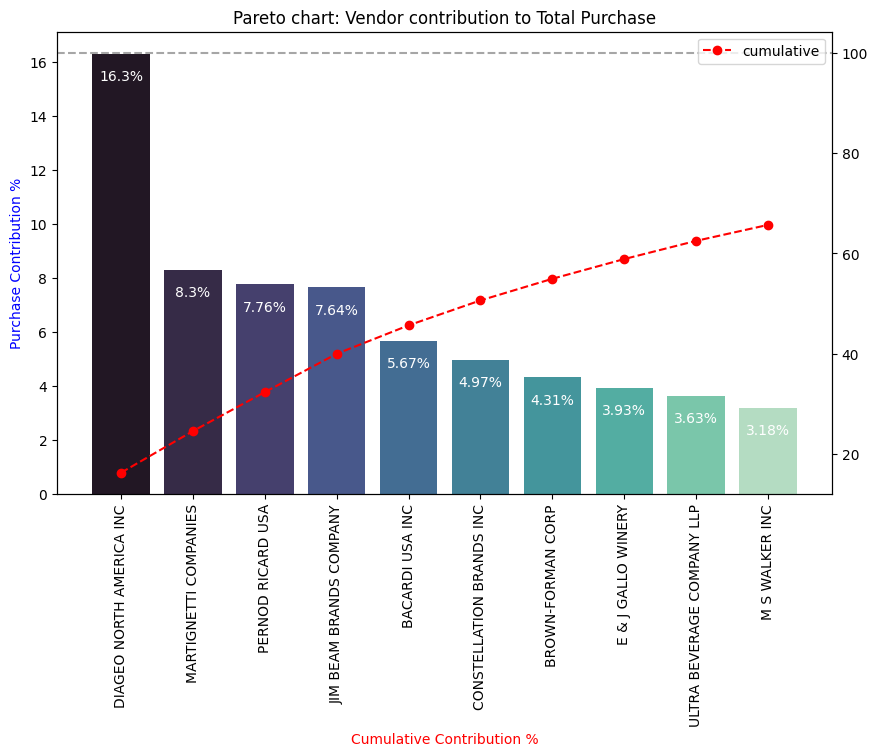

In [34]:
fig,ax1=plt.subplots(figsize=(10,6))
sns.barplot(x=top_vendors['VendorName'],y=top_vendors['purchasecontribution%'], palette="mako",ax=ax1)

for i,value in enumerate(top_vendors['purchasecontribution%']):
    ax1.text(i,value-1,str(value)+'%',ha='center',fontsize=10,color='white')

ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['cumulative_cont%'],color='red',marker='o',linestyle='dashed',label='cumulative')

ax1.set_xticklabels(top_vendors['VendorName'],rotation=90)
ax1.set_ylabel('Purchase Contribution %',color='blue')
ax1.set_xlabel('Cumulative Contribution %',color='red')
ax1.set_title('Pareto chart: Vendor contribution to Total Purchase')

ax2.axhline(y=100,color='gray',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


4.How much of total procurment is dependent on total vendor?

In [35]:
print(f"Total purchase contribution of top 10 vendor is {round(top_vendors['purchasecontribution%'].sum(),2)}%")

Total purchase contribution of top 10 vendor is 65.69%


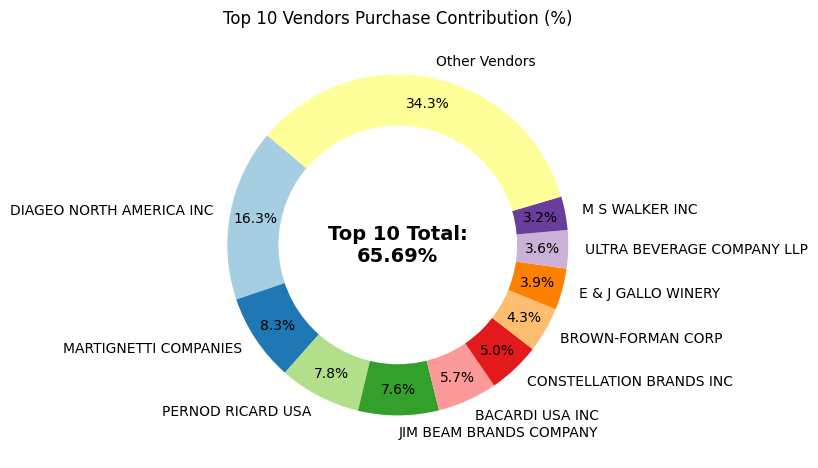

In [37]:
vendors = list(top_vendors['VendorName'].values)
purchase_contribution = list(top_vendors['purchasecontribution%'].values)
total_contribution = sum(purchase_contribution)
remain_contribution = 100 - total_contribution

vendors.append("Other Vendors")
purchase_contribution.append(remain_contribution)

# Fix: Correct figure and subplot creation
fig, ax = plt.subplots(figsize=(8, 8))

# Pie chart
wedges, texts, autotexts = ax.pie(
    purchase_contribution,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw white circle in the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add center text
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14,
         fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendors Purchase Contribution (%)")
plt.tight_layout()
plt.show()


5.Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost saving?

In [38]:
df['unitpurchaseprice']=df['Totalpurchasedoll']/df['Totalpurchasequan']

In [39]:
df["OrderSize"]=pd.qcut(df["Totalpurchasequan"],q=3,labels={"Small","Medium","Large"})


In [40]:
df[['OrderSize','Totalpurchasequan']]

,OrderSize,Totalpurchasequan
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8559,Small,2
8560,Small,6
8561,Small,2
8562,Small,1


In [41]:
df.groupby('OrderSize')[['unitpurchaseprice']].mean()


,unitpurchaseprice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


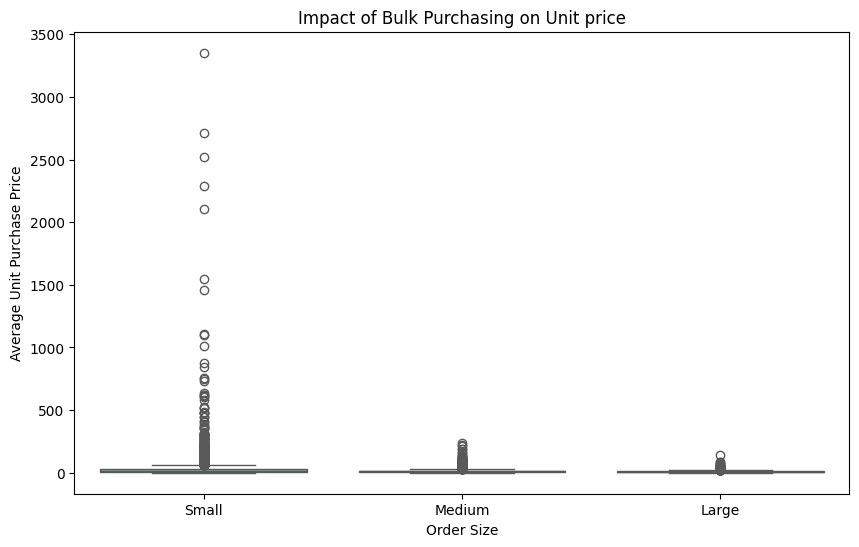

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="OrderSize",y="unitpurchaseprice",palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

5.which vendor have low inventory turnover,indicating excess stock and slow-moving products?

In [43]:
df[df['Stockturnover']<1].groupby('VendorName')[['Stockturnover']].mean().sort_values('Stockturnover',ascending=True).head(10)

,Stockturnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


6.How much capital is locked in unsold inventory per vendor and which vendor and contribute the most to it?

In [44]:
df["unsoldinventory"] = (df["Totalpurchasequan"] - df["totalsalequantity"]) * df["PurchasePrice"]
print('Total unsold capital:', format_dollar(df["unsoldinventory"].sum()))


Total unsold capital: 2.71M


In [45]:
inventory_value_pervendor=df.groupby("VendorName")["unsoldinventory"].sum().reset_index()
inventory_value_pervendor=inventory_value_pervendor.sort_values(by="unsoldinventory",ascending=False)
inventory_value_pervendor['unsoldinventory']=inventory_value_pervendor['unsoldinventory'].apply(format_dollar)
inventory_value_pervendor.head(10)

,VendorName,unsoldinventory
25,DIAGEO NORTH AMERICA INC,722.21k
46,JIM BEAM BRANDS COMPANY,554.67k
68,PERNOD RICARD USA,470.63k
116,WILLIAM GRANT & SONS INC,401.96k
30,E & J GALLO WINERY,228.28k
79,SAZERAC CO INC,198.44k
11,BROWN-FORMAN CORP,177.73k
20,CONSTELLATION BRANDS INC,133.62k
61,MOET HENNESSY USA INC,126.48k
77,REMY COINTREAU USA INC,118.60k


7.what is the 95% confidence interval for profit margins of top-performing and low-performing vendor

In [46]:
top_threshold=df["totalsalesdoll"].quantile(0.75)
low_threshold=df["totalsalesdoll"].quantile(0.25)

In [47]:
top_vendor=df[df["totalsalesdoll"]>=top_threshold]["Profitmargin"].dropna()
low_vendor=df[df["totalsalesdoll"]<=low_threshold]["Profitmargin"].dropna()

In [48]:
top_vendor

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: Profitmargin, Length: 2141, dtype: float64

In [49]:
top_vendor

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: Profitmargin, Length: 2141, dtype: float64

In [50]:
def confidence_interval(data,confidence=0.95):
    mean_val=np.mean(data)
    std_err=np.std(data,ddof=1)/np.sqrt(len(data))
    t_critical=stats.t.ppf((1+confidence)/2,df=len(data)-1)
    margin_of_error=t_critical *std_err
    return mean_val,mean_val- margin_of_error,mean_val+margin_of_error

Top Vendor 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendor 95% CI: (40.50, 42.64), Mean: 41.57


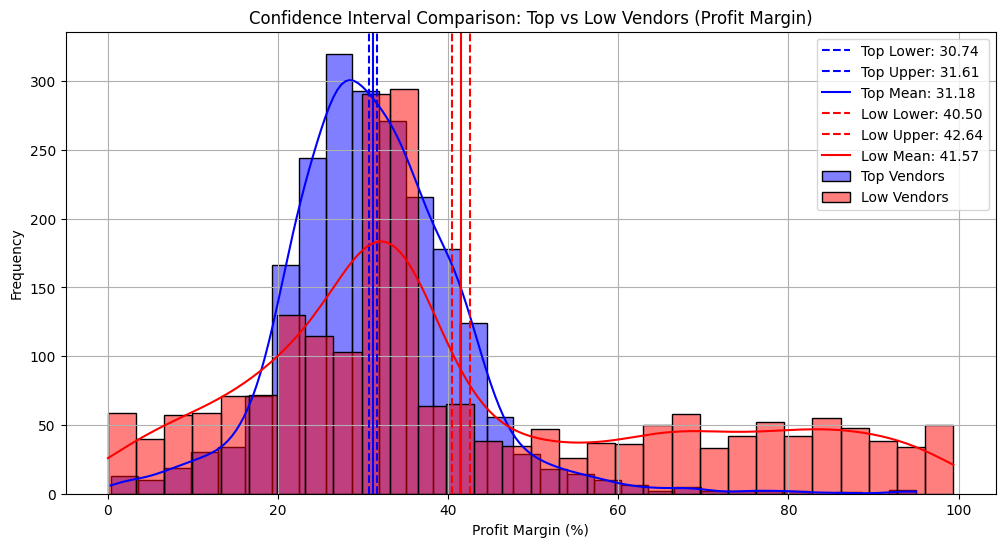

In [51]:


# Ensure you pass numeric series
top_mean, top_lower, top_upper = confidence_interval(top_vendor)
low_mean, low_lower, low_upper = confidence_interval(low_vendor)

print(f"Top Vendor 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendor 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# Plotting
plt.figure(figsize=(12, 6))

# Top Vendors
sns.histplot(top_vendor, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors
sns.histplot(low_vendor, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

plt.title("Confidence Interval Comparison: Top vs Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

 